In [1]:
import re
from collections import Counter
import pandas as pd
import os

# Enter path to texts per year
PATH = None

# Define patterns to match exact forms and compound words containing the N-word
patterns = [
    r'\bNigger\b',       # Matches 'Nigger'
    r'\bNigga\b',        # Matches 'Nigga'
    r'\bNegro\b',        # Matches 'Negro'
    r'\bNegress\b',      # Matches 'Negress'
    r'\bNigra\b',        # Matches 'Nigra'
    r'\bNiggah\b',       # Matches 'Niggah'
    r'\bNiggar\b',       # Matches 'Niggar'
    r'\bNigguh\b',       # Matches 'Nigguh'
    r'\bNiggur\b',       # Matches 'Niggur'
    r'\bNiggors\b',      # Matches plural forms like 'Niggors'
    r'\bNegroes\b',      # Matches 'Negroes'
    r'\bNegroid\b',      # Matches 'Negroid'
    r'\bNegroide\b',     # Matches 'Negroide'
    r'\bNigger\w*\b',    # Matches 'Nigger' followed by any alphanumeric characters (for compounds)
    r'\bNigga\w*\b',     # Matches 'Nigga' followed by any alphanumeric characters (for compounds)
    r'\bNegro\w*\b',     # Matches 'Negro' followed by any alphanumeric characters (for compounds)
]

extreme_patterns = [
    r'\bNigger\b',       # Matches 'Nigger'
    r'\bNigga\b',        # Matches 'Nigga'
    r'\bNigger\w*\b',    # Matches 'Nigger' followed by any alphanumeric characters (for compounds)
    r'\bNigga\w*\b',     # Matches 'Nigga' followed by any alphanumeric characters (for compounds)
]

# Compile the patterns into a single regular expression
combined_pattern = re.compile('|'.join(patterns), re.IGNORECASE)
combined_extreme_pattern = re.compile('|'.join(extreme_patterns), re.IGNORECASE)
combined_pattern

re.compile(r'\bNigger\b|\bNigga\b|\bNegro\b|\bNegress\b|\bNigra\b|\bNiggah\b|\bNiggar\b|\bNigguh\b|\bNiggur\b|\bNiggors\b|\bNegroes\b|\bNegroid\b|\bNegroide\b|\bNigger\w*\b|\bNigga\w*\b|\bNegro\w*\b',
           re.IGNORECASE|re.UNICODE)

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = 'path/to/your/file.zip'

# Directory to extract to
extract_to_dir = 'path/to/extract/directory'

# Create the directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f'Extracted {zip_file_path} to {extract_to_dir}')

In [2]:
with open('/app/src/ChronoBerg/cade/text_four.txt', 'r', encoding='utf-8') as f:
    text_ = f.readlines()
    

FileNotFoundError: [Errno 2] No such file or directory: '/app/src/ChronoBerg/cade/text_four.txt'

In [250]:
import json
with open('/app/src/ChronoBerg/cade/hate_trd_fb.json', 'r') as f:
    hate_one = json.load(f) 

In [251]:
len(hate_one['text'])

61966

In [ ]:
hate_one['text'][:10], hate_one['scores'][:10]

In [35]:
#text_ = re.sub(r'[\x80-\xFF]', '', text_)
text_ = re.sub('\.', ' ', text_)
#text_ = re.sub('ÿ', '', text_)

In [ ]:
import string 

In [172]:
import re
match = re.findall(r'\d+', text_)  
match

[]

In [38]:
with open('/app/src/ChronoBerg/text_five.txt', 'w', encoding='utf-8') as f:
    f.write(text_)  

In [5]:
import os
os.getcwd()
os.chdir('/app/src')

In [7]:
os.listdir("/app/src/ChronoBerg/")

['cade']

In [2]:
with open('/app/src/ChronoBerg/cade/dictionary_new/text_t.txt', 'r', encoding='utf-8') as f:
    t_ = f.read()
    

In [ ]:
import re 
re.findall(r'\bNigger\b', t_)

'letters to his son  by earl of chesterfield fine art man of the world gentleman letter c london janu'

In [4]:
t_[0]

'l'

with open()

In [20]:
fag_pattern = r'\bfaggots?\b(?:\'s?)?\b'
gay_pattern = r'\bgay(?:er|est|s)?\b'
queer_pattern = r'\bqueer(ed|ing|s)?\b'

In [3]:
def count_occurrences(pattern, text):
    """ Count occurrences of all patterns in the text """
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    #print(matches)
    return len(matches)

def count_words(text):
    """ Count the total number of words in the text """
    words = re.findall(r'\b\w+\b', text)  # \b\w+\b matches words
    return len(words)

In [ ]:
re.findall(combined_pattern, t_)

ValueError: cannot process flags argument with a compiled pattern

In [ ]:
# Create an empty list to store results
results = []

for filename in os.listdir(PATH):
    if filename.endswith('.txt'):
        # Extract the year from the filename (assuming the format Year.txt)
        year = filename.split('.')[0]
        
        # Read the content of the file
        with open(os.path.join(PATH, filename), 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Count the total number of words
        total_words = count_words(text)
    
        # Count occurrences of the N-word and compound words
        n_word_count = count_occurrences(combined_pattern, text)
        n_extreme_word_count = count_occurrences(combined_extreme_pattern, text)
    
        # Calculate the proportion
        proportion = (n_word_count / total_words) * 100 if total_words > 0 else 0
        extreme_proportion =(n_extreme_word_count / total_words) * 100 if total_words > 0 else 0
        
        # Append the results to the list
        results.append({
            'Year': year,
            'Occurrences': n_word_count,
            'Extreme_Occurrences': n_extreme_word_count,
            'Total_Words': total_words,
            'Proportion': proportion,
            'Extreme_Proportion': extreme_proportion
        })
        
# Convert the list of results to a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('n_word_analysis.csv', index=False)

print('Analysis saved to n_word_analysis.csv')

In [5]:
# COunt N-word usages:

counter = 0
for filename in os.listdir(PATH):
    if filename.endswith('.txt'):  
        # Read the content of the file
        with open(os.path.join(PATH, filename), 'r', encoding='utf-8') as file:
            text = file.read()
            
        counter += count_occurrences(r'\bNigger\b', text)

print(counter)

12185


In [23]:
# Analyze for other words with shifted meanings
# Create an empty list to store results
results = []

for filename in os.listdir(PATH):
    if filename.endswith('.txt'):
        # Extract the year from the filename (assuming the format Year.txt)
        year = filename.split('.')[0]
        
        # Read the content of the file
        with open(os.path.join(PATH, filename), 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Count the total number of words
        total_words = count_words(text)
    
        # Count occurrences of the N-word and compound words
        fag_count = count_occurrences(fag_pattern, text)
        gay_count = count_occurrences(gay_pattern, text)
        queer_count = count_occurrences(queer_pattern, text)
        
        # Append the results to the list
        results.append({
            'Year': year,
            'fag_count': fag_count,
            'gay_count': gay_count,
            'queer_count': queer_count,
            'word_count': total_words,
        })
        
# Convert the list of results to a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df.to_csv('shifted_words_analysis.csv', index=False)

print('Analysis saved to shifted_words_analysis.csv')

Analysis saved to shifted_words_analysis.csv


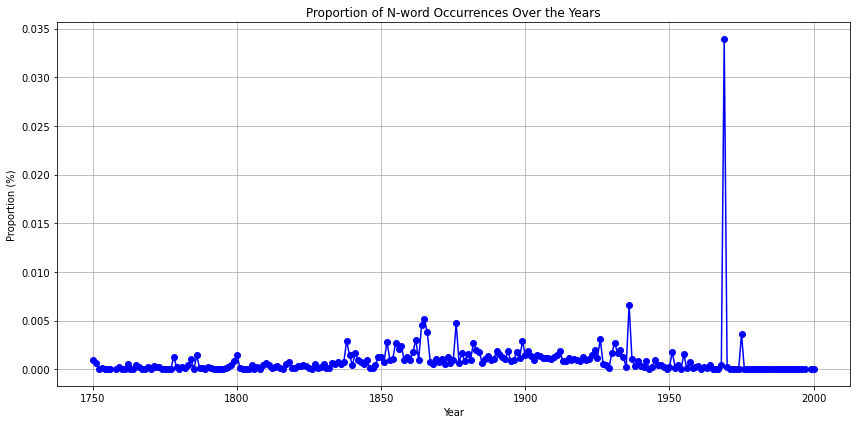

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

prop = "Proportion"

# Load the DataFrame from the CSV file
df = pd.read_csv('n_word_analysis.csv')

# Ensure the 'Year' column is in numeric format for proper sorting
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with NaN values in 'Year' or 'Proportion' columns
df = df.dropna(subset=['Year', prop])

# Convert 'Year' and 'Proportion' to lists for safe plotting
years = df['Year'].tolist()
proportions = df[prop].tolist()

# Sort the data by year
sorted_indices = sorted(range(len(years)), key=lambda i: years[i])
years_sorted = [years[i] for i in sorted_indices]
proportions_sorted = [proportions[i] for i in sorted_indices]

# Create a line plot for the proportion of N-word occurrences over the years
plt.figure(figsize=(12, 6))
plt.plot(years_sorted, proportions_sorted, marker='o', linestyle='-', color='b')

# Set plot title and labels
plt.title(f'{prop} of N-word Occurrences Over the Years')
plt.xlabel('Year')
plt.ylabel(f'{prop} (%)')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


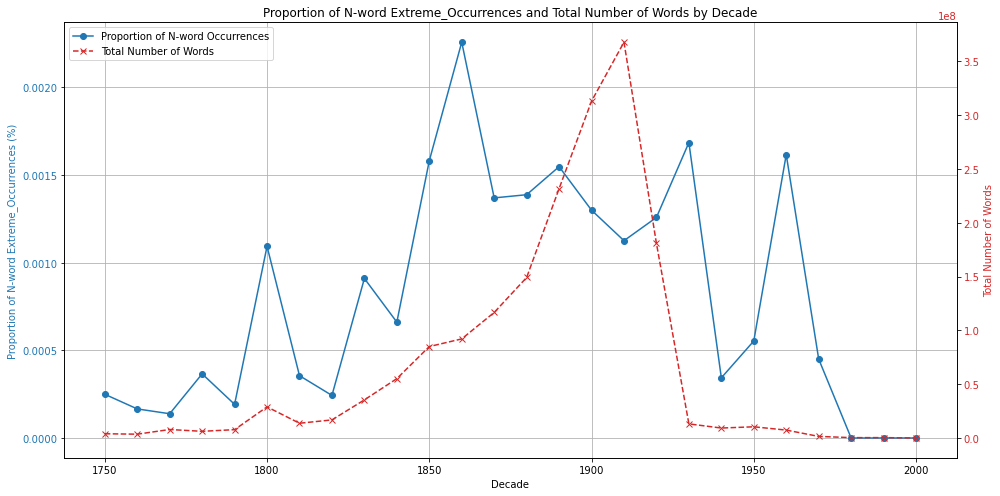

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

occ = "Extreme_Occurrences"

# Load the DataFrame from the CSV file
df = pd.read_csv('n_word_analysis.csv')

# Ensure 'Year' is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with NaN values in 'Year', 'Occurrences', or 'Total_Words' columns
df = df.dropna(subset=['Year', occ, 'Total_Words'])

# Define a function to determine the decade for a given year
def get_decade(year):
    if pd.isna(year):
        return None
    return (year // 10) * 10

# Apply the function to create a 'Decade' column
df['Decade'] = df['Year'].apply(get_decade)

# Group by 'Decade' and aggregate occurrences and word counts
decade_data = df.groupby('Decade').agg(
    total_occurrences=(occ, 'sum'),
    total_words=('Total_Words', 'sum')
).reset_index()

# Calculate the proportion for each decade
decade_data['Proportion'] = (decade_data['total_occurrences'] / decade_data['total_words']) * 100

# Convert DataFrame columns to NumPy arrays
decades_sorted = decade_data['Decade'].values
proportions_sorted = decade_data['Proportion'].values
total_words_sorted = decade_data['total_words'].values

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the proportion of N-word occurrences on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Decade')
ax1.set_ylabel(f'Proportion of N-word {occ} (%)', color=color)
ax1.plot(decades_sorted, proportions_sorted, marker='o', linestyle='-', color=color, label='Proportion of N-word Occurrences')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the total number of words
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Number of Words', color=color)  
ax2.plot(decades_sorted, total_words_sorted, marker='x', linestyle='--', color=color, label='Total Number of Words')
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title(f'Proportion of N-word {occ} and Total Number of Words by Decade')
ax1.grid(True)

# Combine legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
